# ***Import library and data set***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [3]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


#**1.Perform exploratory data analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


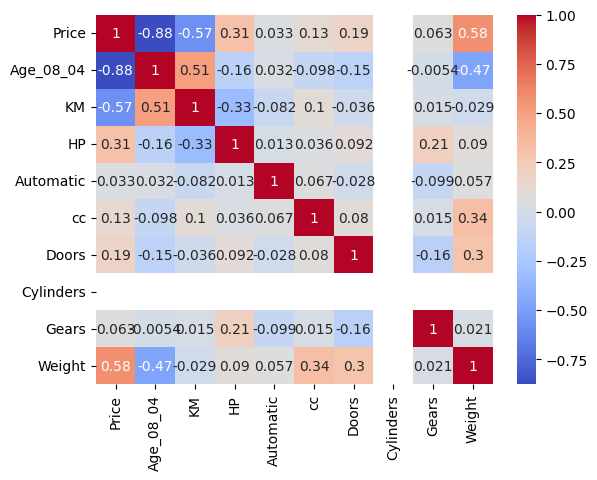

In [8]:
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Here you can see there is no null value ,data type is fine and there is no missing value is the data base**

#**2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [10]:
df=pd.get_dummies(df,columns=['Fuel_Type','Automatic'],drop_first=True)

In [11]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1
0,13500,23,46986,90,2000,3,4,5,1165,True,False,False
1,13750,23,72937,90,2000,3,4,5,1165,True,False,False
2,13950,24,41711,90,2000,3,4,5,1165,True,False,False
3,14950,26,48000,90,2000,3,4,5,1165,True,False,False
4,13750,30,38500,90,2000,3,4,5,1170,True,False,False


In [12]:
# Define the independent varible is X and Target varible is Y
x=df.drop(columns=["Price"])
y=df['Price']

In [13]:
#Scalling the feature
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [14]:
x_scaled

array([[-1.77196633, -0.57469494, -0.76804185, ...,  2.87480715,
        -2.71087388, -0.24289308],
       [-1.77196633,  0.11745379, -0.76804185, ...,  2.87480715,
        -2.71087388, -0.24289308],
       [-1.71818412, -0.71538641, -0.76804185, ...,  2.87480715,
        -2.71087388, -0.24289308],
       ...,
       [ 0.80957948, -1.37403589, -1.03513832, ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 0.75579727, -1.37670303, -1.03513832, ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 1.0784905 , -1.82784925,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
x_train

array([[ 0.32553964, -0.24639704, -1.03513832, ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 0.64823286, -0.18577302,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308],
       [-0.85766886, -0.79694746,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308],
       ...,
       [ 1.29361931,  0.08552816,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 0.37932184, -0.102505  , -1.03513832, ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 1.29361931,  1.10597477,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308]])

In [17]:
x_test

array([[-0.31984681, -1.2277701 , -0.30062303, ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 0.64823286,  0.31719567,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 0.16419302,  1.63940217, -1.96997596, ...,  2.87480715,
        -2.71087388, -0.24289308],
       ...,
       [-0.85766886, -0.72530816,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 1.0784905 , -1.82784925,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308],
       [ 0.16419302, -0.84226212,  0.5674405 , ..., -0.34784942,
         0.36888474, -0.24289308]])

In [18]:
y_train

,Price
899,9500
881,9795
310,12950
1145,6450
31,15750
...,...
1095,6900
1130,7950
1294,6950
860,9750


In [19]:
y_test

,Price
594,10800
754,9950
630,7500
1259,9250
903,9750
...,...
174,21950
1428,8450
297,12850
1435,6950


In [20]:
x_train,x_test,y_train,y_test

(array([[ 0.32553964, -0.24639704, -1.03513832, ..., -0.34784942,
          0.36888474, -0.24289308],
        [ 0.64823286, -0.18577302,  0.5674405 , ..., -0.34784942,
          0.36888474, -0.24289308],
        [-0.85766886, -0.79694746,  0.5674405 , ..., -0.34784942,
          0.36888474, -0.24289308],
        ...,
        [ 1.29361931,  0.08552816,  0.5674405 , ..., -0.34784942,
          0.36888474, -0.24289308],
        [ 0.37932184, -0.102505  , -1.03513832, ..., -0.34784942,
          0.36888474, -0.24289308],
        [ 1.29361931,  1.10597477,  0.5674405 , ..., -0.34784942,
          0.36888474, -0.24289308]]),
 array([[-0.31984681, -1.2277701 , -0.30062303, ..., -0.34784942,
          0.36888474, -0.24289308],
        [ 0.64823286,  0.31719567,  0.5674405 , ..., -0.34784942,
          0.36888474, -0.24289308],
        [ 0.16419302,  1.63940217, -1.96997596, ...,  2.87480715,
         -2.71087388, -0.24289308],
        ...,
        [-0.85766886, -0.72530816,  0.5674405 , ..., -

#**3.Build a multiple linear regression model**

In [21]:
#Bulid a multiple linear regression model using the training dataset .
#Interpret the coefficients of the model.
#Build minimum of three different models
#First build the library
from sklearn.linear_model import LinearRegression

In [22]:
#Build linear Regression model with all variables
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [23]:
#find the coefficients and intercept value
model1.coef_

array([-2.24666244e+03, -6.08570564e+02,  2.10253304e+02, -1.28850688e+01,
       -5.74368449e+01,  1.70530257e-13,  1.03946283e+02,  1.36213868e+03,
       -2.12708849e+01,  4.45102711e+02,  3.41360751e+01])

In [24]:
model1.intercept_

10746.677976264662

Try with a subset of variables (exclude highly correlated variables if needed)

In [25]:
# Just an example of selected columns
x_train_subset=x_train[:,[0,2,4,6]]
x_test_subset=x_test[:,[0,2,4,6]]

In [26]:
model2=LinearRegression()
model2.fit(x_train_subset,y_train)

LinearRegression()

In [27]:
#find the model2 coefficients and intercept
model2.coef_

array([-3034.44653057,   601.93895099,   182.66027508,   104.51795664])

In [28]:
model2.intercept_

10741.334848222265

In [29]:
#Apply the Transformation like log transformation on selected feature
from sklearn.impute import SimpleImputer

In [30]:
#Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

In [31]:
x_train_log=np.log1p(x_train)
x_train_log=imputer.fit_transform(x_train_log)

x_test_log=np.log1p(x_test)
x_test_log=imputer.transform(x_test_log)

In [32]:
model3=LinearRegression()
model3.fit(x_train_log,y_train)

LinearRegression()

In [33]:
#Here find the coefficients and intercept
model3.coef_

array([-1.16001716e+03, -1.11758582e+03, -1.20041753e+03,  7.63430525e+02,
       -1.64703393e+02,  8.23515536e+10,  2.76913767e+02,  1.57691483e+03,
       -9.99609182e+02, -2.42901687e+15,  4.90320237e+01])

In [34]:
model3.intercept_

762702426072338.2

#**4. Evaluting the models**


Evaluting the performance of the model using appropriate evalution metrics on the testing data

In [35]:
# first import the library
from sklearn.metrics import mean_squared_error,r2_score

Model 1 Evaluation

In [36]:
y_pred1=model1.predict(x_test)
mse1=mean_squared_error(y_test,y_pred1)
r2_1=r2_score(y_test,y_pred1)

In [ ]:
print(f'Model 1-R²: {r2_1}, MSE: {mse1}, RMSE: {np.sqrt(mse1)}')

Model 1-R²: 0.834888804061108, MSE: 2203043.823143705, RMSE: 1484.2654153296521


Model 2 Evalution

In [37]:
y_pred2=model2.predict(x_test_subset)
mse2=mean_squared_error(y_test,y_pred2)
r2_2=r2_score(y_test,y_pred2)

In [38]:
print(f"Model 1 - R² : {r2_2}, MSE: {mse2}, RMSE: {np.sqrt(mse2)}")

Model 1 - R² : 0.8027677013500933, MSE: 2631628.91404363, RMSE: 1622.2296119981381


Model 3 Evaluation

In [39]:
y_pred3=model3.predict(x_test_log)
mse3=mean_squared_error(y_test,y_pred3)
r2_3=r2_score(y_test,y_pred3)

In [40]:
print(f'Model 3 - R²: {r2_3}, MSE: {mse3}, RMSE: {np.sqrt(mse3)}')

Model 3 - R²: 0.3424600269776711, MSE: 8773417.016330294, RMSE: 2961.995445021868


#**Applying Lasso and Ridge Regression**

Apply Lasso and Ridge method on the model

In [41]:
from sklearn.linear_model import Lasso,Ridge

#**Lasso Regression**

In [42]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)
mse_lasso=mean_squared_error(y_test,y_pred_lasso)

In [43]:
print(f'Lasso RMSE: {np.sqrt(mse_lasso)}, Coefficients: {lasso.coef_}')

Lasso RMSE: 1484.1610734392257, Coefficients: [-2246.643415    -608.62417972   210.36539177   -12.78664418
   -57.25467436     0.           103.88307746  1361.70489148
   -21.02821101   444.95656971    34.07934976]


#**Ridge Regression**

In [44]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
mse_ridge=mean_squared_error(y_test,y_pred_ridge)

In [45]:
print(f'Ridge RMSE: {np.sqrt(mse_ridge)}, Coefficients: {ridge.coef_}')

Ridge RMSE: 1484.1852216211075, Coefficients: [-2246.44992968  -608.73867965   210.38374177   -12.87150784
   -57.34763231     0.           103.95726249  1361.86187163
   -21.32804161   444.71000491    34.15758066]


#**Interview Questions:**

1.What is Normalization & Standardization and how is it helpful?

**Normailzation:** Normalization rescales data to a specific range, typically between 0 and 1 (or -1 and 1). It is useful when features do not follow a normal distribution or when algorithms (like neural networks) require bounded inputs.


**Standardiaztion :**  Standardization transforms data to have a mean of 0 and a standard deviation of 1, making it useful when features follow a normal distribution or when algorithms (like linear regression or SVM) assume normally distributed data.

It is helpfull in models like linear regression and SVMs, where large values can dominates

2.What is teachniques can be used to Address multicollinerity in multiple linear regression?


1. Variance Inflation Factor (VIF) Thresholding
2. Regularization Methods (Lasso, Elastic Net)
3. Principal Component Analysis (PCA)
4. Ridge Regression (L2 Regularization)
5. Partial Least Squares Regression (PLS)
